In [12]:
from cdlib import algorithms
import networkx as nx

import matplotlib.pyplot as plt
import matplotlib.colors as colors
%matplotlib inline

Note: to be able to use all crisp methods, you need to install some additional packages:  {'leidenalg', 'wurlitzer', 'graph_tool', 'karateclub'}
Note: to be able to use all overlapping methods, you need to install some additional packages:  {'ASLPAw', 'karateclub'}
Note: to be able to use all bipartite methods, you need to install some additional packages:  {'leidenalg', 'wurlitzer'}


In [5]:
G = nx.read_graphml("network-mahsa-amini-prj.graphml")

In [9]:
def findCommunities(G):
    """
    Partition network with the Infomap algorithm.
    Annotates nodes with 'community' id and return number of communities found.
    """
    infomapWrapper = infomap.Infomap("--two-level --silent")

    print("Building Infomap network from a NetworkX graph...")
    for e in G.edges_iter():
        infomapWrapper.addLink(*e)

    print("Find communities with Infomap...")
    infomapWrapper.run();

    tree = infomapWrapper.tree

    print("Found %d modules with codelength: %f" % (tree.numTopModules(), tree.codelength()))

    communities = {}
    for node in tree.leafIter():
        communities[node.originalLeafIndex] = node.moduleIndex()

    nx.set_node_attributes(G, 'community', communities)
    return tree.numTopModules()

In [10]:
def drawNetwork(G):
    # position map
    pos = nx.spring_layout(G)
    # community ids
    communities = [v for k,v in nx.get_node_attributes(G, 'community').items()]
    numCommunities = max(communities) + 1
    # color map from http://colorbrewer2.org/
    cmapLight = colors.ListedColormap(['#a6cee3', '#b2df8a', '#fb9a99', '#fdbf6f', '#cab2d6'], 'indexed', numCommunities)
    cmapDark = colors.ListedColormap(['#1f78b4', '#33a02c', '#e31a1c', '#ff7f00', '#6a3d9a'], 'indexed', numCommunities)

    # Draw edges
    nx.draw_networkx_edges(G, pos)

    # Draw nodes
    nodeCollection = nx.draw_networkx_nodes(G,
        pos = pos,
        node_color = communities,
        cmap = cmapLight
    )
    # Set node border color to the darker shade
    darkColors = [cmapDark(v) for v in communities]
    nodeCollection.set_edgecolor(darkColors)

    # Draw node labels
    for n in G.nodes_iter():
        plt.annotate(n,
            xy = pos[n],
            textcoords = 'offset points',
            horizontalalignment = 'center',
            verticalalignment = 'center',
            xytext = [0, 0],
            color = cmapDark(communities[n])
        )

    plt.axis('off')
    # plt.savefig("karate.png")
    plt.show()

In [ ]:
# findCommunities(G)
coms = algorithms.infomap(G)

In [ ]:
drawNetwork(G)

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.colors as colors

from infomap import Infomap
import infomap

"""
Generate and draw a network with NetworkX, colored
according to the community structure found by Infomap.
"""

def findCommunities(G):
	"""
	Partition network with the Infomap algorithm.
	Annotates nodes with 'community' id and return number of communities found.
	"""
# 	conf = infomap.init("--two-level");
	# Input data
	network = Infomap('--two-level');
	# Output data
	tree = infomap.HierarchicalNetwork(conf)

	print("Building network...")
	for e in G.edges_iter():
		network.addLink(*e)

	network.finalizeAndCheckNetwork(True, nx.number_of_nodes(G));

	# Cluster network
	infomap.run(network, tree);

	print("Found %d top modules with codelength: %f" % (tree.numTopModules(), tree.codelength()))

	communities = {}
	clusterIndexLevel = 1 # 1, 2, ... or -1 for top, second, ... or lowest cluster level
	for node in tree.leafIter(clusterIndexLevel):
		communities[node.originalLeafIndex] = node.clusterIndex()

	nx.set_node_attributes(G, 'community', communities)
	return tree.numTopModules()


def drawNetwork(G):
	# position map
	pos = nx.spring_layout(G)
	# community ids
	communities = [v for k,v in nx.get_node_attributes(G, 'community').items()]
	numCommunities = max(communities) + 1
	# color map from http://colorbrewer2.org/
	cmapLight = colors.ListedColormap(['#a6cee3', '#b2df8a', '#fb9a99', '#fdbf6f', '#cab2d6'], 'indexed', numCommunities)
	cmapDark = colors.ListedColormap(['#1f78b4', '#33a02c', '#e31a1c', '#ff7f00', '#6a3d9a'], 'indexed', numCommunities)

	# edges
	nx.draw_networkx_edges(G, pos)

	# nodes
	nodeCollection = nx.draw_networkx_nodes(G,
		pos = pos,
		node_color = communities,
		cmap = cmapLight
	)
	# set node border color to the darker shade
	darkColors = [cmapDark(v) for v in communities]
	nodeCollection.set_edgecolor(darkColors)

	# Print node labels separately instead
	for n in G.nodes_iter():
		plt.annotate(n,
			xy = pos[n],
			textcoords = 'offset points',
			horizontalalignment = 'center',
			verticalalignment = 'center',
			xytext = [0, 2],
			color = cmapDark(communities[n])
		)

	plt.axis('off')
	# plt.savefig("karate.png")
	plt.show()


G=nx.karate_club_graph()

numCommunities = findCommunities(G)

print("Number of communities found: %d" % numCommunities)

drawNetwork(G)

In [4]:
import os.path
from infomap import Infomap

# conf = infomap.init("--silent -N5")
# Add output directory (and output name) to automatically write result to file
# conf = infomap.init("--silent -N5 . --out-name test")

filename = "network-mahsa-amini-prj.net"
name = os.path.splitext(os.path.basename(filename))[0]
print("Loading network from '%s'..." % filename)
network = Infomap('--silent -N5')
network.readInputData(filename)

print("Running Infomap...")
tree = infomap.HierarchicalNetwork(conf)
infomap.run(network, tree)

print("Found %d top modules with codelength: %f" % (tree.numTopModules(), tree.codelength()))

print("Writing top level clusters to %s_level1.clu..." % name)
tree.writeClu("%s_level1.clu" % name, 1)
print("Writing second level clusters to %s_level2.clu..." % name)
tree.writeClu("%s_level2.clu" % name, 2)

print("Writing tree to %s.tree..." % name)
tree.writeHumanReadableTree("%s.tree" % name)

Loading network from '/Users/mehran/Desktop/final project/network-mahsa-amini-prj.net'...


RuntimeError: Negative node weight (-114.257) from line ' -114.25677 -265.49048 0.0'

In [6]:
from igraph import *

g=Graph.Read_GraphML("network-mahsa-amini-prj.graphml")

p=g.community_infomap()
Q=g.modularity(p)
print(Q)

0.2958564422328483


In [7]:
from igraph import *

g2=Graph.Read_GraphML("network-mahsa-amini-prj-undirected.graphml")

p2=g.community_infomap()
Q2=g.modularity(p2)
print(Q2)

0.294110250670254


In [18]:
len(p)

4269

In [15]:
Graph.write(p, 'aaa.csv')

AttributeError: 'VertexClustering' object has no attribute '_format_mapping'

<AxesSubplot:>

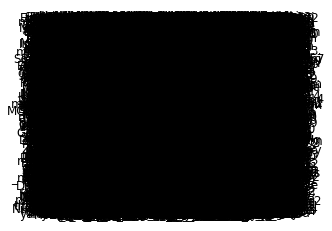

In [10]:
import igraph as ig
import matplotlib.pyplot as plt

palette = ig.RainbowPalette(n=len(p))

fig, ax = plt.subplots()
ig.plot(
    p,
    palette=palette,
    edge_width=1,
    target=ax,
    vertex_size=0.3,
)

In [ ]:
G = nx.read_graphml("network-mahsa-amini-prj.graphml")

In [ ]:
# G = nx.karate_club_graph()
coms = algorithms.infomap(G, '--two-level')
# coms = algorithms.infomap(G, '-a 1')
# coms = algorithms.infomap(G, '--two-level')